# Import

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
import plotly.express as px

In [1]:
 import spacy

In [3]:
!python -m spacy download en_core_web_sm

     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     - -------------------------------------- 0.5/12.8 MB 9.8 MB/s eta 0:00:02
     - -------------------------------------- 0.5/12.8 MB 5.6 MB/s eta 0:00:03
     -- ------------------------------------- 0.7/12.8 MB 4.9 MB/s eta 0:00:03
     -- ------------------------------------- 0.9/12.8 MB 4.8 MB/s eta 0:00:03
     --- ------------------------------------ 1.1/12.8 MB 4.5 MB/s eta 0:00:03
     --- ------------------------------------ 1.2/12.8 MB 4.2 MB/s eta 0:00:03
     ---- ----------------------------------- 1.3/12.8 MB 4.1 MB/s eta 0:00:03
     ---- ----------------------------------- 1.5/12.8 MB 4.0 MB/s eta 0:00:03
     ----- ---------------------------------- 1.6/12.8 MB 3.9 MB/s eta 0:00:03
     ----- ---------------------------------- 1.7/12.8 MB 3.7 MB/s eta 0:00:03
     ----- ---------------------------------- 1.9/12.8 MB 3.7 MB/s eta 0:00:03
     ------ --------------------------------- 2.1/12.8 MB 3

# Code

In [4]:
ratings = pd.read_csv("./data/ratings.csv")

In [5]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,110,1.0,1425941529
1,1,147,4.5,1425942435
2,1,858,5.0,1425941523
3,1,1221,5.0,1425941546
4,1,1246,5.0,1425941556


In [6]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26024289 entries, 0 to 26024288
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int64  
 1   movieId    int64  
 2   rating     float64
 3   timestamp  int64  
dtypes: float64(1), int64(3)
memory usage: 794.2 MB


In [7]:
ratings.isna().sum()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

In [8]:
ratings

,userId,movieId,rating,timestamp
0,1,110,1.0,1425941529
1,1,147,4.5,1425942435
2,1,858,5.0,1425941523
3,1,1221,5.0,1425941546
4,1,1246,5.0,1425941556
...,...,...,...,...
26024284,270896,58559,5.0,1257031564
26024285,270896,60069,5.0,1257032032
26024286,270896,63082,4.5,1257031764
26024287,270896,64957,4.5,1257033990


In [3]:
movies = pd.read_csv('./data/movies_metadata.csv')

C:\Users\mahat\AppData\Local\Temp\ipykernel_14456\2914910117.py:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  movies = pd.read_csv('./data/movies_metadata.csv')


In [10]:
movies_famous = movies[["title","popularity"]]

In [11]:
movies_famous.dropna(inplace=True)

C:\Users\mahat\AppData\Local\Temp\ipykernel_25720\2420511664.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_famous.dropna(inplace=True)


In [12]:
movies_famous['popularity'] = movies_famous['popularity'].astype(float)

C:\Users\mahat\AppData\Local\Temp\ipykernel_25720\3320596827.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_famous['popularity'] = movies_famous['popularity'].astype(float)


In [13]:
pd.options.display.max_columns = None

In [14]:
movies.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.7129,/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.859495,/16XOMpEaLWkrcPqSQqhTmeJuqQl.jpg,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.387519,/e64sOI48hQXyru7naBFyssKFxVd.jpg,"[{'name': 'Sandollar Productions', 'id': 5842}...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [15]:
movies_famous = movies_famous.sort_values("popularity",ascending=False).reset_index().head(10)

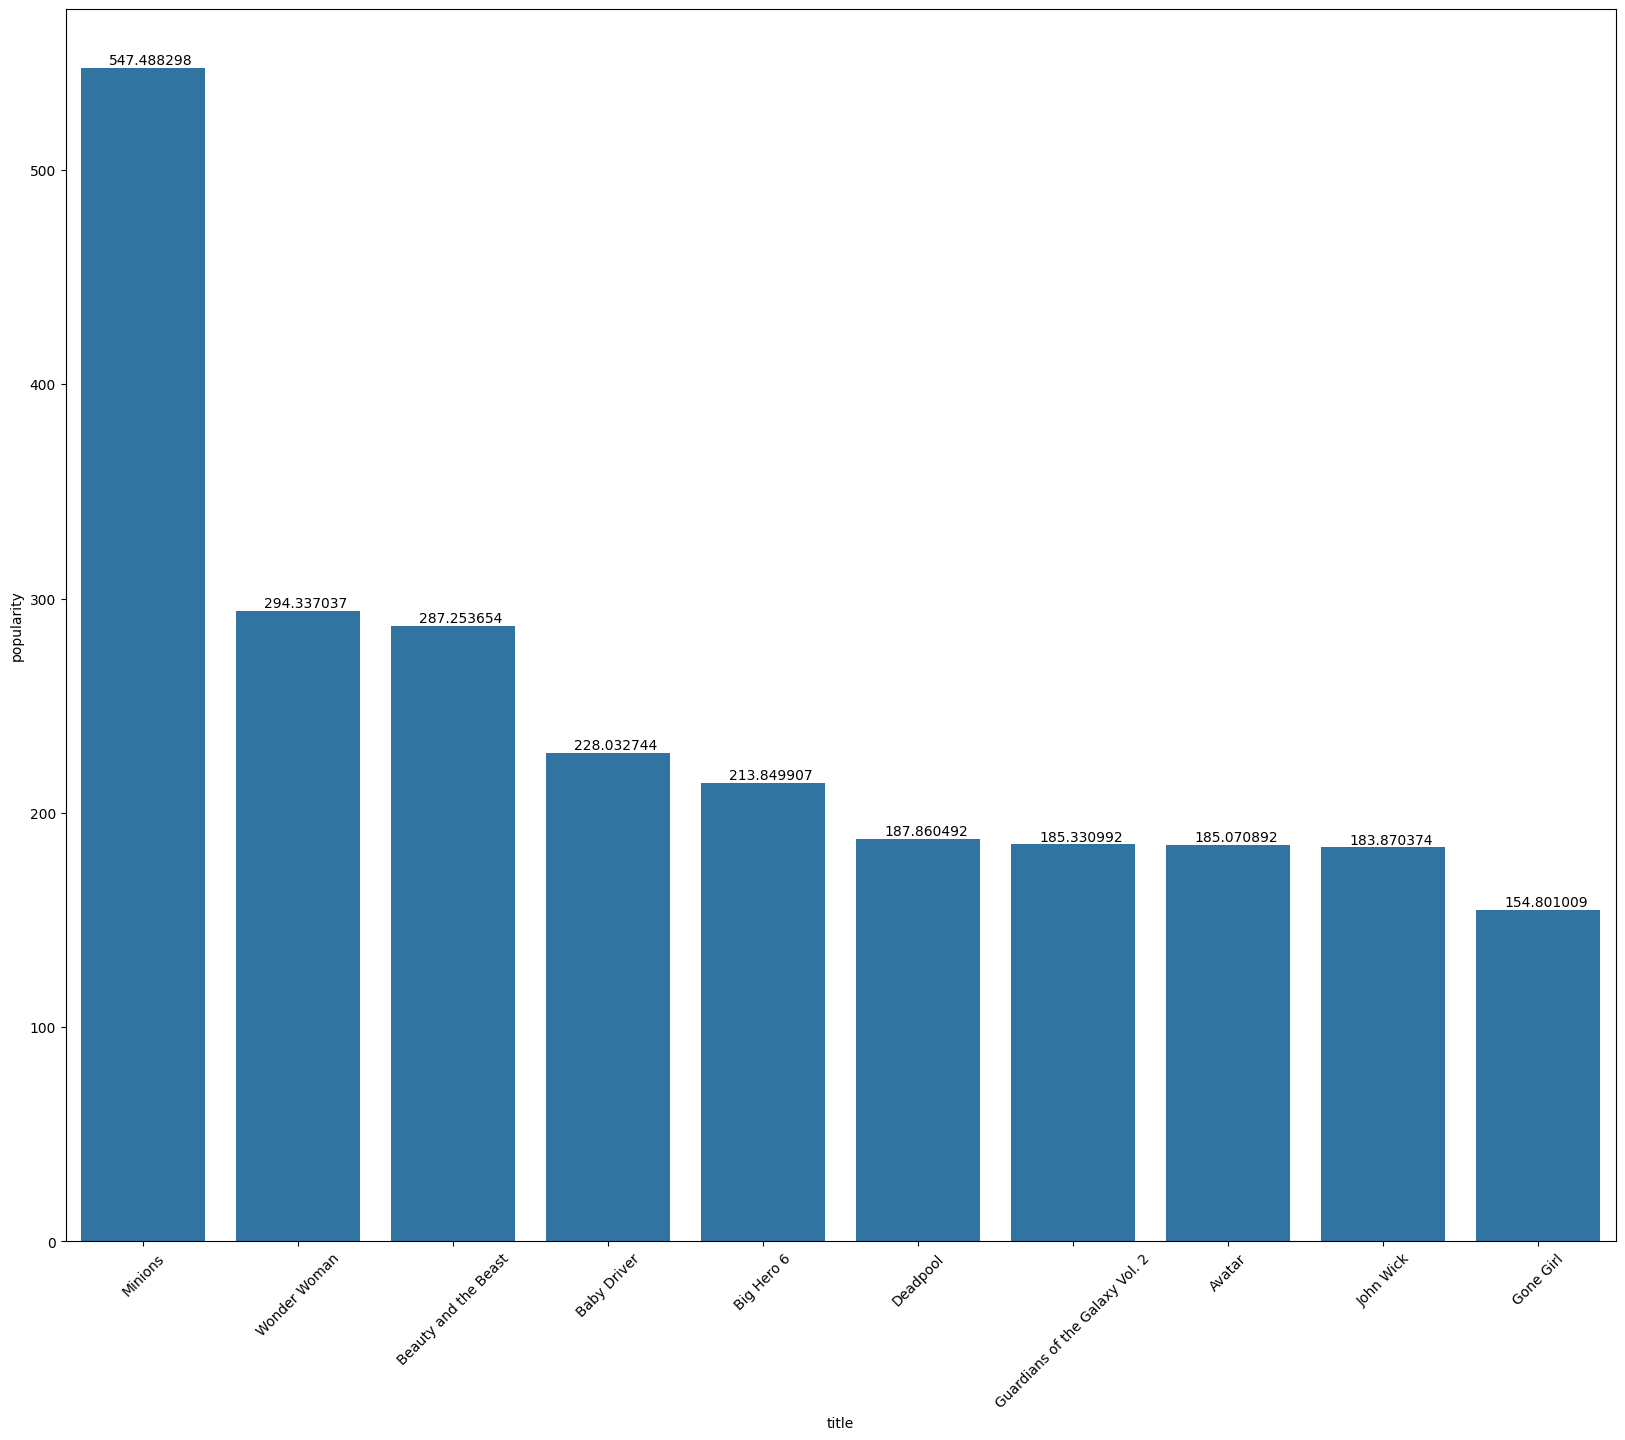

In [16]:
plt.figure(figsize=(20,16))

ax = sns.barplot(movies_famous, x = "title", y = "popularity")

for a in ax.patches:
    plt.annotate(a.get_height(),(a.get_x() + a.get_width()*0.225,a.get_height() + 1.5))
plt.xticks(rotation=45)

plt.show()

In [17]:
movies_famous.isna().sum()

index         0
title         0
popularity    0
dtype: int64

In [18]:
movies['overview'].head(5)

0    Led by Woody, Andy's toys live happily in his ...
1    When siblings Judy and Peter discover an encha...
2    A family wedding reignites the ancient feud be...
3    Cheated on, mistreated and stepped on, the wom...
4    Just when George Banks has recovered from his ...
Name: overview, dtype: object

In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=2472,norm='l1',ngram_range=(1,1),stop_words='english',strip_accents='ascii',analyzer='word')

movies.overview = movies.overview.fillna('')

In [5]:
x= movies['overview'].values.reshape(1,-1)

tfidf_ii = tfidf.fit(x.ravel())

tfidf_matrix = tfidf_ii.transform(x.ravel()) 


tfidf_matrix.shape

(45466, 2472)

In [7]:
sim_sim = tfidf_matrix * tfidf_matrix.T 

In [ ]:
print(sim_sim)

In [45]:
print(tfidf_matrix)

  (0, 1956)	0.05258743185884497
  (0, 1914)	0.04588649421942726
  (0, 1878)	0.04497437147636929
  (0, 1675)	0.05431285852806516
  (0, 1656)	0.037155585949897846
  (0, 1593)	0.041851270457117846
  (0, 1345)	0.04813685903345849
  (0, 1324)	0.035258335419409176
  (0, 1293)	0.04343341269132426
  (0, 1289)	0.04100472223187246
  (0, 1026)	0.040829669741196346
  (0, 1011)	0.05381441413065392
  (0, 758)	0.04220071926864913
  (0, 675)	0.05381441413065392
  (0, 616)	0.05450825105935788
  (0, 395)	0.0507132867120416
  (0, 282)	0.042995569840441464
  (0, 235)	0.05005079112402686
  (0, 107)	0.16647154212719195
  (1, 2464)	0.021544999289540047
  (1, 2449)	0.019976675432212175
  (1, 2326)	0.04149640828719813
  (1, 2264)	0.034211687676186237
  (1, 2199)	0.036573742123656015
  (1, 1996)	0.04195368046779117
  :	:
  (45464, 1275)	0.020817572272705278
  (45464, 1091)	0.02198033593996659
  (45464, 964)	0.021313385127198086
  (45464, 799)	0.0282463898097703
  (45464, 653)	0.026881819030065472
  (45464, 629)

In [37]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Input, Add, Activation, Dropout

In [38]:
from tensorflow.keras.models import Model, load_model

In [39]:
from tensorflow.keras.initializers import glorot_uniform

In [40]:
gpus = tf.config.experimental.list_physical_devices('GPU') 
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [41]:
encoding_dim = 1000

input_dim = Input(shape=(tfidf_matrix.shape[1],))

x = Dense(encoding_dim, activation='relu')(input_dim)
x = Dense(4_000, activation='relu')(x)
x = Dense(2000, activation='relu')(x)
encoded = Dense(1000, activation='relu')(x)
x = Dense(2000, activation='relu')(x)
x = Dense(4_000, activation='relu')(x)
decoded = Dense(tfidf_matrix.shape[1])(x)

autoencoder = Model(input_dim, decoded)

encoder = Model(input_dim, encoded)

autoencoder.compile(optimizer='adam', loss='mean_squared_error')


In [42]:
autoencoder.fit(tfidf_matrix.astype(float),tfidf_matrix.astype(float), batch_size= 128, epochs=25, verbose=1)

ValueError: Unrecognized data type: x=  (0, 1983)	0.20326326873927897
  (0, 1941)	0.17744759617932548
  (0, 1904)	0.17383693085297205
  (0, 1694)	0.20993246425536755
  (0, 1674)	0.14361541503626762
  (0, 1610)	0.16156281822531704
  (0, 1359)	0.1860607177062015
  (0, 1338)	0.13623824320374614
  (0, 1306)	0.1678186527346349
  (0, 1302)	0.15849326692675733
  (0, 1036)	0.1577275598836122
  (0, 1021)	0.20800585491314794
  (0, 768)	0.16311608759900942
  (0, 685)	0.20754273292961187
  (0, 625)	0.21068770411390267
  (0, 402)	0.19601923998249085
  (0, 286)	0.16618837920312246
  (0, 239)	0.19345853271869665
  (0, 108)	0.6434531713902338
  (1, 2492)	0.10225821641067026
  (1, 2477)	0.09438146261212092
  (1, 2354)	0.19681726113245
  (1, 2291)	0.1622658669768071
  (1, 2225)	0.17346907964473687
  (1, 2022)	0.19898610084391363
  :	:
  (45464, 1288)	0.08791876639351318
  (45464, 1102)	0.09282946135321547
  (45464, 974)	0.09001273075967552
  (45464, 809)	0.11929286059937792
  (45464, 662)	0.11352987450106222
  (45464, 638)	0.09142910232326756
  (45464, 622)	0.11120324672448538
  (45464, 470)	0.11477630394298646
  (45464, 438)	0.08258322766106165
  (45464, 294)	0.10003004401247612
  (45464, 293)	0.08487993311998435
  (45464, 261)	0.10785770018664564
  (45464, 38)	0.09923622205017697
  (45464, 35)	0.12358526716828498
  (45465, 2492)	0.1957584672418036
  (45465, 2464)	0.24409473692991818
  (45465, 1825)	0.32241215740335866
  (45465, 1438)	0.230969058829282
  (45465, 944)	0.31791384241264264
  (45465, 835)	0.3412631166265563
  (45465, 631)	0.2549137426693365
  (45465, 599)	0.36762245913035707
  (45465, 359)	0.2721714141807236
  (45465, 25)	0.35872926670881805
  (45465, 20)	0.3526742071823785 (of type <class 'scipy.sparse._csr.csr_matrix'>)

In [6]:
from sklearn.metrics.pairwise import cosine_similarity,cosine_distances







In [47]:
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

MemoryError: Unable to allocate 15.4 GiB for an array with shape (45466, 45466) and data type float64

In [31]:
cosine_dist = cosine_distances(tfidf_matrix,tfidf_matrix)

MemoryError: Unable to allocate 15.4 GiB for an array with shape (45466, 45466) and data type float64

In [74]:
np.save('cosine_sim',cosine_sim)

KeyboardInterrupt: 

In [10]:
movies['title'] = movies['title'].str.strip()
indices = pd.Series(movies.index, index= movies['title']).drop_duplicates()

In [22]:
# import pickle
# with open("cosine_sim.pkl","wb") as f:
    
#     pickle.dump(cosine_sim,f)

In [24]:
# with open("cosine_sim.pkl",'rb') as f:
#     cosine_sim = pickle.load(f)

In [11]:
def get_recommendations(title, cosine_sim = cosine_sim):
    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key= lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:11]
    movie_indices = [i[0] for i in sim_scores]
    scores = [i[1] for i in sim_scores]
    titles = [i for i in movies['title'].iloc[movie_indices]]
    return pd.DataFrame({'title':titles, 'score':scores})

In [17]:
get_recommendations("Women vs. Men")

,title,score
0,Great Guy,0.456902
1,Peter Pan,0.456902
2,Blonde Crazy,0.400900
3,The Seventh Company Outdoors,0.343025
4,The Jungle,0.338014
5,Interstellar,0.317658
6,Happy New York,0.312453
7,Vacations in Prostokvashino,0.311215
8,On the Trail of the Bremen Town Musicians,0.307384
9,By the Bluest of Seas,0.298502


In [24]:
duplicated_mask = movies.duplicated('title')

In [27]:
movies['release_date']

0        1995-10-30
1        1995-12-15
2        1995-12-22
3        1995-12-22
4        1995-02-10
            ...    
45461           NaN
45462    2011-11-17
45463    2003-08-01
45464    1917-10-21
45465    2017-06-09
Name: release_date, Length: 45466, dtype: object

In [40]:
movies[movies['release_date'].isna()]

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
711,False,NaN,0,[],NaN,365371,tt0114894,en,War Stories Our Mother Never Told Us,Seven New Zealand women speak about their live...,...,NaN,0.0,95.0,[],Released,NaN,War Stories Our Mother Never Told Us,False,0.0,0.0
734,False,NaN,0,[],NaN,215107,tt0105737,en,Vermont Is for Lovers,Vermont is for Lovers is an independently prod...,...,NaN,0.0,88.0,[],Released,NaN,Vermont Is for Lovers,False,0.0,0.0
3460,False,NaN,0,"[{'id': 18, 'name': 'Drama'}]",NaN,94214,tt0210130,en,"Jails, Hospitals & Hip-Hop","Jails, Hospitals &amp; Hip-Hop is a cinematic ...",...,NaN,10.0,90.0,[],NaN,three worlds / two million voices / one genera...,"Jails, Hospitals & Hip-Hop",False,0.0,0.0
3628,False,NaN,0,[],NaN,207731,tt0217287,en,Boricua's Bond,"Tommy, a talented Puerto Rican painter living ...",...,NaN,0.0,105.0,[],Released,NaN,Boricua's Bond,False,2.0,1.0
5879,False,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",NaN,99885,tt0979876,en,Divine Intervention,Four friends fight an insane man's crusade to ...,...,NaN,0.0,87.0,[],Released,His Judgement Cometh...,Divine Intervention,False,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45148,False,NaN,0,[],NaN,438910,tt0810384,ru,Konstruktor krasnogo tsveta -1993,Engineering Red - 1993 Dir: Andrey I. Y. Petr...,...,NaN,0.0,76.0,[],Released,NaN,Engineering Red,False,6.0,2.0
45203,False,NaN,0,"[{'id': 9648, 'name': 'Mystery'}, {'id': 878, ...",NaN,433711,tt3158690,en,All Superheroes Must Die 2: The Last Superhero,"In a no holds barred documentary, acclaimed jo...",...,NaN,0.0,74.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,All Superheroes Must Die 2: The Last Superhero,False,4.0,1.0
45338,False,NaN,0,[],NaN,335251,tt1883368,en,The Land Where the Blues Began,An exploration of the musical and social origi...,...,NaN,0.0,0.0,[],Released,NaN,The Land Where the Blues Began,False,0.0,0.0
45410,False,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 80, 'name...",NaN,449131,tt0321264,ru,Aprel,,...,NaN,0.0,NaN,[],Released,NaN,Aprel,False,6.0,1.0


In [43]:
movies['release_date'] = pd.to_datetime(movies['release_date'],errors='coerce') 

In [45]:
movies[movies['release_date'].isna()]

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
711,False,NaN,0,[],NaN,365371,tt0114894,en,War Stories Our Mother Never Told Us,Seven New Zealand women speak about their live...,...,NaT,0.0,95.0,[],Released,NaN,War Stories Our Mother Never Told Us,False,0.0,0.0
734,False,NaN,0,[],NaN,215107,tt0105737,en,Vermont Is for Lovers,Vermont is for Lovers is an independently prod...,...,NaT,0.0,88.0,[],Released,NaN,Vermont Is for Lovers,False,0.0,0.0
3460,False,NaN,0,"[{'id': 18, 'name': 'Drama'}]",NaN,94214,tt0210130,en,"Jails, Hospitals & Hip-Hop","Jails, Hospitals &amp; Hip-Hop is a cinematic ...",...,NaT,10.0,90.0,[],NaN,three worlds / two million voices / one genera...,"Jails, Hospitals & Hip-Hop",False,0.0,0.0
3628,False,NaN,0,[],NaN,207731,tt0217287,en,Boricua's Bond,"Tommy, a talented Puerto Rican painter living ...",...,NaT,0.0,105.0,[],Released,NaN,Boricua's Bond,False,2.0,1.0
5879,False,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",NaN,99885,tt0979876,en,Divine Intervention,Four friends fight an insane man's crusade to ...,...,NaT,0.0,87.0,[],Released,His Judgement Cometh...,Divine Intervention,False,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45148,False,NaN,0,[],NaN,438910,tt0810384,ru,Konstruktor krasnogo tsveta -1993,Engineering Red - 1993 Dir: Andrey I. Y. Petr...,...,NaT,0.0,76.0,[],Released,NaN,Engineering Red,False,6.0,2.0
45203,False,NaN,0,"[{'id': 9648, 'name': 'Mystery'}, {'id': 878, ...",NaN,433711,tt3158690,en,All Superheroes Must Die 2: The Last Superhero,"In a no holds barred documentary, acclaimed jo...",...,NaT,0.0,74.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,All Superheroes Must Die 2: The Last Superhero,False,4.0,1.0
45338,False,NaN,0,[],NaN,335251,tt1883368,en,The Land Where the Blues Began,An exploration of the musical and social origi...,...,NaT,0.0,0.0,[],Released,NaN,The Land Where the Blues Began,False,0.0,0.0
45410,False,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 80, 'name...",NaN,449131,tt0321264,ru,Aprel,,...,NaT,0.0,NaN,[],Released,NaN,Aprel,False,6.0,1.0


In [54]:
movies['new title'] = movies['title'] + movies['release_date'].str.

In [55]:
movies

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,new title
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0,Toy StoryToy Story
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0,JumanjiJumanji
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0,Grumpier Old MenGrumpier Old Men
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0,Waiting to ExhaleWaiting to Exhale
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0,Father of the Bride Part IIFather of the Bride...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45461,False,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n...",http://www.imdb.com/title/tt6209470/,439050,tt6209470,fa,رگ خواب,Rising and falling between a man and woman.,...,0.0,90.0,"[{'iso_639_1': 'fa', 'name': 'فارسی'}]",Released,Rising and falling between a man and woman,Subdue,False,4.0,1.0,SubdueSubdue
45462,False,NaN,0,"[{'id': 18, 'name': 'Drama'}]",NaN,111109,tt2028550,tl,Siglo ng Pagluluwal,An artist struggles to finish his work while a...,...,0.0,360.0,"[{'iso_639_1': 'tl', 'name': ''}]",Released,NaN,Century of Birthing,False,9.0,3.0,Century of BirthingCentury of Birthing
45463,False,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...",NaN,67758,tt0303758,en,Betrayal,"When one of her hits goes wrong, a professiona...",...,0.0,90.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A deadly game of wits.,Betrayal,False,3.8,6.0,BetrayalBetrayal
45464,False,NaN,0,[],NaN,227506,tt0008536,en,Satana likuyushchiy,"In a small town live two brothers, one a minis...",...,0.0,87.0,[],Released,NaN,Satan Triumphant,False,0.0,0.0,Satan TriumphantSatan Triumphant
